In [1]:
from __future__ import unicode_literals
from hazm import *
import numpy as np
# import tensorflow as tf
import pandas as pd
from collections import Counter
import csv, re, pickle

# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Flatten
# import numpy as np
# from keras.utils import to_categorical
# import re
# from utils import words_list, stopwords_list
# from stopping_utility import *
# import nltk
# import wapiti

from colorama import Back, Fore, Style
import time
from sklearn import metrics
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn import manifold
import pyclustering as pyclus
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data = pd.read_excel("dataset.xlsx")
reviews = data['question']
# rate = data['Score']
labels = list(data['subject'])

In [185]:
# stopwords_list(reviews,"dataset1.txt")

In [186]:
# labels

In [4]:


RE_USELESS = r'[^\w]'  # remove useless characters
RE_DIGIT = r"^\d+\s|\s\d+\s|\s\d+$"  # remove digits
RE_SPACE = r'\s+'  # remove space
RE_EMAILS = r'[\w\.-]+@[\w\.-]+'
RE_URLS = r'http\S+'
RE_WWW = r'www\S+'


def clean_all_save(document, save_file_path):
    """
    this function generate raw persian text, it remove non-persian character
    and all numbers and symbols
    :param document:
    :param save_file_path:
    :return:
    """
    with open(save_file_path, 'w') as output:
        for sentence in document:
            sentence = clean_sentence(sentence)
            output.write(sentence + '\n')
    return None


def clean_all(document, doc_pattern=r'<TEXT>(.*?)</TEXT>'):
    """
    clean text like hamshahri, irBlogs, and other Treck format
    :param document:
    :param doc_pattern:
    :return:
    """
    clean = ''
    document = re.findall(doc_pattern, document, re.DOTALL)
    for sentence in document:
        sentence = clean_sentence(sentence)
        clean += ' \n' + sentence
    return clean


def clean_sentence(sentence):
    sentence = re.sub(r'[^\u0621-\u06ff]', ' ', sentence)
    sentence = arToPersianChar(sentence)
    sentence = arToPersianNumb(sentence)
    sentence = faToEnglishNumb(sentence)
    sentence = re.sub(r'[a-zA-Z]', ' ', sentence)
    sentence = re.sub(r'[0-9]', ' ', sentence)
    sentence = re.sub(RE_WWW, r' ', sentence)
    sentence = re.sub(RE_URLS, r' ', sentence)
    sentence = re.sub(RE_EMAILS, r' ', sentence)
    sentence = re.sub(RE_USELESS, r' ', sentence)
    sentence = re.sub(RE_DIGIT, r' ', sentence)
    sentence = re.sub(RE_SPACE, r' ', sentence)
    return sentence


def arToPersianNumb(number):
    dic = {
        '١': '۱',
        '٢': '۲',
        '٣': '۳',
        '٤': '۴',
        '٥': '۵',
        '٦': '۶',
        '٧': '۷',
        '٨': '۸',
        '٩': '۹',
        '٠': '۰',
    }
    return multiple_replace(dic, number)


def arToPersianChar(userInput):
    dic = {
        'ك': 'ک',
        'دِ': 'د',
        'بِ': 'ب',
        'زِ': 'ز',
        'ذِ': 'ذ',
        'شِ': 'ش',
        'سِ': 'س',
        'ى': 'ی',
        'ي': 'ی'
    }
    return multiple_replace(dic, userInput)


def faToEnglishNumb(number):
    dic = {
        '۰': '0',
        '۱': '1',
        '۲': '2',
        '۳': '3',
        '۴': '4',
        '۵': '5',
        '۶': '6',
        '۷': '7',
        '۸': '8',
        '۹': '9',
    }
    return multiple_replace(dic, number)


def multiple_replace(dic, text):
    pattern = "|".join(map(re.escape, dic.keys()))
    return re.sub(pattern, lambda m: dic[m.group()], str(text))

In [5]:
def clean_all(document):
    clean = ''
    for sentence in document:
        sentence = clean_sentence(sentence)
        clean += sentence
    return clean

In [6]:
j = k = i = 0
reviews1 = []
labels1 = []
# labels1 = list(labels.copy())
normalizer = Normalizer()
for review in reviews:
    sentences = sent_tokenize(normalizer.normalize(clean_all(review)))
    reviews1.extend(sentences)
    for j in range(len(sentences)):
        labels1.insert(i + k, labels[i])
        k += 1
    i += 1

In [190]:
print(len(reviews1),len(labels1))

79 79


In [7]:
reviews[4]

'سلام خدمت اساتید محترم . سوال داشتم برای فراموش کردن اسمی که با دیدن ویا اوری اون اسم احساس گناه در گذشته تجسم میشه برام چطور میتونم از این که اون اسم شی که یاد اور اون کار هست و هر دفعه با دیدن یا شنیدن اون اسم خاص حالت تشوش و دلهره میگیرم را از بین ببرم؟ تو اون لحظه کلا که اون اسم برام تداعی میشه احساس بدی به اون پیدا کردم وطوریه که اون اسم همه جا هم هست و نمیشه از ش فرارکرد..ایا باید دباره اون اتفاق را بازسازی کنم و خودم را ببخشم؟ البته میخام اینکار بکنم ولی سخته برام…'

In [8]:
#cleaning dataset
words=[]
all_text = ''
# stemmer = Stemmer()
for t in range (len(reviews1)):
    text = reviews1[t]
    text = text.replace('\u200c',' ')
    text = text.replace('\u200f',' ')
    text = re.sub(r'[^a-zA-Z0-9آ-ی۰-۹ ]', ' ', text)
    all_text += text
    all_text += ' '
    wordsInText = text.split()
    for word in wordsInText:
#         word = stemmer.stem(word)
        if word != ' ' or word != '':
            words.append(word)
len(words)

6671

In [9]:
len(all_text)

31806

In [10]:
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

with open("mySavedDict.txt", "wb") as myFile:
    pickle.dump(vocab_to_int, myFile)

'''
with open("mySavedDict.txt", "rb") as myFile:
    myNewPulledInDictionary = pickle.load(myFile)
'''

'\nwith open("mySavedDict.txt", "rb") as myFile:\n    myNewPulledInDictionary = pickle.load(myFile)\n'

In [194]:
# vocab

In [11]:
reviews_ints = []
for each in reviews1:
    #print (each)
    each = each.replace('\u200c',' ')
    each = each.replace('\u200f',' ')
    each = re.sub(r'[^a-zA-Z0-9آ-ی۰-۹ ]', ' ', each)
    reviews_ints.append([vocab_to_int[word] for word in each.split()])


review_lens = Counter([len(x) for x in reviews_ints])
print("Zero-length reviews: {}".format(review_lens[0]))
print("Maximum review length: {}".format(max(review_lens)))


Zero-length reviews: 0
Maximum review length: 218


In [196]:
# reviews_ints[1]

In [12]:
mi = 15000
su = ma = 0
i = 0
low = []
for each in reviews_ints:
    if len(each) == 2 or len(each) == 1:
        low.append(i)
    if len(each) <= mi:
#         print(each,i,len(each))
        mi = len(each)
    if len(each) > ma:
        ma = len(each)
    su += len(each)
    i += 1
print('min lenght: '+str(mi),' and max lenght: '+str(ma),' and mean lenght: '+str(su/len(reviews_ints)))



min lenght: 9  and max lenght: 218  and mean lenght: 84.44303797468355


In [13]:
reviews_ints22 = reviews_ints.copy()
for i in range(len(low)):
    print(reviews_ints22.pop(low[len(low)- i -1]),low[len(low)- i -1])
len(reviews_ints22)


79

In [14]:
reviews_ints = reviews_ints22.copy()

In [15]:
# lstm_size = 256
# lstm_layers = 1
# batch_size = 200
# learning_rate = 0.001

# data_dim = 16
# timesteps = 25
# num_classes = 2

n_words = len(vocab)
print (n_words)

1930


In [16]:
seq_len = 30
features = np.zeros((len(reviews_ints), seq_len), dtype=int)

for i, row in enumerate(reviews_ints):
#     print (i , row)
#     print (i )
#     print ('****')
    features[i, -len(row):] = np.array(row)[:seq_len]
pd.DataFrame(features)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,11,199,92,17,37,1,23,200,8,6,...,3,728,8,729,83,730,1,731,4,17
1,6,11,2,94,755,6,203,28,756,76,...,762,763,764,45,463,20,10,765,464,766
2,6,11,468,8,17,4,778,779,153,201,...,782,1,322,783,784,1,323,52,3,785
3,6,11,253,2,9,801,3,20,2,9,...,254,6,803,4,20,2,9,9,804,21
4,11,482,812,813,258,79,80,814,178,815,...,259,818,87,156,484,333,3,10,4,19
5,11,83,112,199,16,43,17,37,13,23,...,40,63,337,1,840,841,488,1,842,158
6,6,498,11,482,863,864,2,97,130,59,...,866,4,867,28,58,130,485,56,342,94
7,11,2,107,17,37,81,887,30,64,17,...,24,26,13,889,63,263,40,505,98,1
8,11,83,112,510,21,264,466,219,467,2,...,9,6,7,324,319,9,117,1,896,897
9,75,2,270,904,185,355,26,48,17,34,...,271,5,70,221,511,3,906,907,908,512


In [17]:
import configparser
import numpy as np
import pandas as pd

from cluster import Clustering
from genetic import Genetic
from generation import Generation



In [30]:


NORMALIZATION = True


def readVars(config_file):
    config = configparser.ConfigParser()
    config.read(config_file)
    budget = int(config.get("vars", "budget"))
    kmax = int(config.get("vars", "kmax"))  # Maximum number of Clusters
    numOfInd = int(config.get("vars", "numOfInd"))  # number of individual
    Ps = float(config.get("vars", "Ps"))
    Pm = float(config.get("vars", "Pm"))
    Pc = float(config.get("vars", "Pc"))

    return budget, kmax, Ps, Pm, Pc, numOfInd


# minmax normalization
def minmax(data):
    normData = data
    data = data.astype(float)
    normData = normData.astype(float)
    for i in range(0, data.shape[1]):
        tmp = data.iloc[:, i]
        # max of each column
        maxElement = np.amax(tmp)
        # min of each column
        minElement = np.amin(tmp)

        # norm_dat.shape[0] : size of row
        for j in range(0, normData.shape[0]):
            normData[i][j] = float(
                data[i][j] - minElement) / (maxElement - minElement)

    normData.to_csv('result/norm_data.csv', index=None, header=None)
    return normData
data = pd.DataFrame(features)
data = minmax(data)  # normalize
if __name__ == '__main__':
    config_file = "config.txt"
#     if(NORMALIZATION):
#         data = pd.read_csv('data/iris.csv', header=None)

#         data = minmax(data)  # normalize
#     else:
#         data = pd.read_csv('result/norm_data.csv', header=None)

    # size of column
    dim = data.shape[1]

    # kmeans parameters & GA parameters
    generationCount = 0
    budget, kmax, Ps, Pm, Pc, numOfInd = readVars(config_file)

    budget = 30
    kmax = 8
#     numOfInd =20
#     Ps =0.4
#     Pm =0.05
#     Pc =0.8
    
    print("-------------GA Info-------------------")
    print("budget", budget)
    print("kmax", kmax)
    print("numOfInd", numOfInd)
    print("Ps", Ps)
    print("Pm", Pm)
    print("Pc", Pc)
    print("---------------------------------------")

    # dim or pattern id 
    chromosome_length = kmax * dim

    #-------------------------------------------------------#
    # 							main 						#
    #-------------------------------------------------------#
    initial = Generation(numOfInd, 0)
    initial.randomGenerateChromosomes(
        chromosome_length)  # initial generate chromosome

    clustering = Clustering(initial, data, kmax)  # eval fit of chromosomes

    # ------------------calc fitness------------------#
    generation = clustering.calcChromosomesFit()

    # ------------------------GA----------------------#
    while generationCount <= budget:
        GA = Genetic(numOfInd, Ps, Pm, Pc, budget, data, generationCount, kmax)
        generation, generationCount = GA.geneticProcess(
            generation)
        iBest = generation.chromosomes[0]
        clustering.printIBest(iBest)

    # ------------------output result-------------------#
#     clustering.output_result(iBest, data)

-------------GA Info-------------------
budget 30
kmax 8
numOfInd 20
Ps 0.2
Pm 0.02
Pc 0.8
---------------------------------------
------------Generation: 0 -----------------
iBest Fitness: 0.4155034542310613
all index: [0, 6, 0, 4, 0, 6, 6, 3, 4, 6, 0, 0, 6, 2, 6, 6, 6, 4, 4, 3, 6, 6, 0, 0, 3, 4, 4, 6, 0, 6, 0, 6, 0, 6, 4, 6, 4, 3, 4, 7, 4, 7, 0, 0, 6, 6, 2, 3, 6, 6, 3, 2, 0, 6, 4, 0, 6, 6, 4, 6, 3, 4, 4, 0, 3, 6, 7, 4, 3, 6, 4, 6, 4, 3, 6, 3, 3, 0, 4]
Clusters centroid:
centroid 0  : [0.62, 0.53, 0.97, 0.03, 0.68, 0.15, 0.16, 0.64, 0.05, 0.86, 0.24, 0.2, 0.03, 0.24, 0.23, 0.15, 0.06, 0.55, 0.44, 0.03, 0.91, 0.75, 0.22, 0.57, 0.97, 0.69, 0.28, 0.93, 0.37, 0.29]
centroid 1  : [0.11, 0.79, 0.52, 0.4, 0.56, 0.59, 0.86, 0.63, 0.11, 0.72, 0.28, 0.96, 0.05, 0.8, 0.19, 0.64, 0.63, 0.83, 0.97, 0.85, 0.05, 0.68, 0.97, 0.92, 0.45, 0.17, 0.86, 0.95, 0.17, 0.14]
centroid 2  : [0.98, 0.24, 0.12, 0.25, 1.0, 0.18, 0.05, 0.89, 0.7, 0.05, 0.14, 0.01, 0.66, 0.93, 0.03, 0.01, 0.18, 0.04, 0.05, 0.48, 0.9

iBest Fitness: 0.4366428948207437
all index: [0, 6, 0, 6, 0, 6, 6, 3, 6, 6, 3, 3, 6, 2, 3, 6, 6, 6, 6, 3, 6, 6, 3, 0, 3, 4, 3, 6, 0, 6, 6, 6, 0, 6, 4, 3, 6, 7, 6, 7, 4, 7, 0, 0, 6, 6, 2, 3, 6, 6, 3, 2, 0, 6, 6, 6, 6, 6, 3, 6, 3, 4, 6, 6, 3, 6, 7, 4, 3, 6, 4, 6, 3, 4, 6, 3, 6, 0, 6]
Clusters centroid:
centroid 0  : [0.62, 0.53, 0.97, 0.03, 0.68, 0.15, 0.16, 0.64, 0.05, 0.86, 0.24, 0.2, 0.03, 0.24, 0.23, 0.15, 0.06, 0.55, 0.44, 0.03, 0.91, 0.75, 0.22, 0.57, 0.97, 0.69, 0.28, 0.93, 0.37, 0.29]
centroid 1  : [1.0, 0.79, 0.52, 0.4, 0.56, 0.59, 0.86, 0.63, 0.11, 0.72, 0.28, 0.96, 0.05, 0.8, 0.19, 0.64, 0.63, 0.83, 0.97, 0.85, 0.05, 0.68, 0.97, 0.92, 0.45, 0.17, 0.86, 0.95, 0.17, 0.14]
centroid 2  : [0.98, 0.24, 0.12, 0.25, 1.0, 0.18, 0.05, 0.89, 0.7, 0.05, 0.14, 0.01, 0.66, 0.93, 0.03, 0.01, 0.18, 0.04, 0.05, 0.17, 0.95, 0.45, 0.27, 0.48, 0.84, 0.78, 0.79, 0.56, 0.61, 0.22]
centroid 3  : [0.76, 0.41, 0.02, 0.78, 0.72, 0.44, 0.72, 0.39, 0.15, 0.18, 0.18, 0.32, 0.22, 0.69, 0.1, 0.74, 0.91, 0.0

iBest Fitness: 0.46733779770933737
all index: [6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6, 3, 6, 3, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 3, 6, 6, 2, 7, 6, 6, 6, 6, 6, 3, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 2, 6, 6, 7, 6, 3, 6, 6, 6, 3, 3, 6, 3, 3, 3, 6]
Clusters centroid:
centroid 0  : [0.62, 0.53, 0.97, 0.71, 0.68, 0.15, 0.64, 0.95, 0.05, 0.86, 0.24, 0.2, 0.03, 0.4, 0.23, 0.15, 0.06, 0.55, 0.44, 0.03, 0.91, 0.75, 0.99, 0.57, 0.97, 0.69, 0.28, 0.93, 0.37, 0.29]
centroid 1  : [0.11, 0.79, 0.52, 0.4, 0.56, 0.59, 0.86, 0.78, 0.11, 0.72, 0.28, 0.96, 0.05, 0.8, 0.19, 0.64, 0.63, 0.83, 0.97, 0.85, 0.05, 0.68, 0.97, 0.13, 0.45, 0.54, 0.86, 0.95, 0.17, 0.14]
centroid 2  : [0.98, 0.24, 0.12, 0.25, 1.0, 0.18, 0.05, 0.89, 0.7, 0.05, 0.14, 0.01, 0.66, 0.93, 0.03, 0.38, 0.28, 0.04, 0.05, 0.46, 0.85, 0.52, 0.88, 0.48, 0.03, 0.9, 0.1, 0.56, 0.61, 0.22]
centroid 3  : [0.08, 0.41, 0.02, 0.78, 0.72, 0.44, 0.72, 0.39, 0.15, 0.18, 0.18, 0.32, 0.22, 0.69, 0.1, 0.74, 0.91, 0.03

iBest Fitness: 0.4956984183656821
all index: [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 2, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 3, 3, 6, 3, 3, 3, 6]
Clusters centroid:
centroid 0  : [0.62, 0.53, 0.97, 0.71, 0.68, 0.15, 0.79, 0.23, 0.05, 0.86, 0.24, 0.2, 0.03, 0.12, 0.23, 0.15, 0.06, 0.55, 0.44, 0.03, 0.91, 0.75, 0.99, 0.57, 0.97, 0.69, 0.28, 0.93, 0.37, 0.29]
centroid 1  : [0.11, 0.79, 0.52, 0.4, 0.56, 0.59, 0.57, 0.78, 0.11, 0.72, 0.28, 0.88, 0.05, 0.8, 0.19, 0.64, 0.63, 0.83, 0.97, 0.85, 0.05, 0.68, 0.97, 0.13, 0.45, 0.54, 0.86, 0.95, 0.17, 0.16]
centroid 2  : [0.98, 0.67, 0.12, 0.51, 0.37, 0.18, 0.05, 0.89, 0.7, 0.05, 0.14, 0.01, 0.66, 0.93, 0.67, 0.38, 0.84, 0.04, 0.05, 0.46, 0.85, 0.52, 0.09, 0.98, 0.84, 0.9, 0.1, 0.56, 0.61, 0.22]
centroid 3  : [0.08, 0.41, 0.02, 0.78, 0.72, 0.44, 0.72, 0.39, 0.15, 0.18, 0.18, 0.02, 0.22, 0.69, 0.1, 0.74, 0.91, 0.0

iBest Fitness: 0.4956984183656821
all index: [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 2, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 3, 3, 6, 3, 3, 3, 6]
Clusters centroid:
centroid 0  : [0.62, 0.53, 0.97, 0.71, 0.68, 0.15, 0.79, 0.23, 0.05, 0.86, 0.24, 0.2, 0.03, 0.12, 0.23, 0.15, 0.06, 0.55, 0.44, 0.03, 0.91, 0.75, 0.99, 0.57, 0.97, 0.69, 0.28, 0.93, 0.37, 0.29]
centroid 1  : [0.11, 0.79, 0.52, 0.4, 0.56, 0.59, 0.57, 0.78, 0.11, 0.72, 0.28, 0.88, 0.05, 0.8, 0.19, 0.64, 0.63, 0.83, 0.97, 0.85, 0.05, 0.68, 0.97, 0.13, 0.45, 0.54, 0.86, 0.95, 0.17, 0.16]
centroid 2  : [0.98, 0.67, 0.12, 0.51, 0.37, 0.18, 0.05, 0.89, 0.7, 0.05, 0.14, 0.01, 0.66, 0.93, 0.67, 0.38, 0.84, 0.04, 0.05, 0.46, 0.85, 0.52, 0.09, 0.98, 0.84, 0.9, 0.1, 0.56, 0.61, 0.22]
centroid 3  : [0.08, 0.41, 0.02, 0.78, 0.72, 0.44, 0.72, 0.39, 0.15, 0.18, 0.18, 0.02, 0.22, 0.69, 0.1, 0.74, 0.91, 0.0

iBest Fitness: 0.5086099144130034
all index: [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 2, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 3, 3, 6, 3, 6, 3, 6]
Clusters centroid:
centroid 0  : [0.62, 0.53, 0.97, 0.71, 0.68, 0.15, 0.79, 0.23, 0.05, 0.86, 0.24, 0.2, 0.03, 0.12, 0.23, 0.15, 0.06, 0.55, 0.44, 0.03, 0.91, 0.75, 0.99, 0.57, 0.97, 0.69, 0.28, 0.93, 0.37, 0.29]
centroid 1  : [0.11, 0.79, 0.52, 0.4, 0.56, 0.59, 0.57, 0.78, 0.11, 0.72, 0.28, 0.88, 0.05, 0.8, 0.19, 0.64, 0.63, 0.83, 0.97, 0.85, 0.05, 0.68, 0.97, 0.13, 0.45, 0.54, 0.86, 0.95, 0.17, 0.16]
centroid 2  : [0.98, 0.67, 0.12, 0.51, 0.19, 0.18, 0.05, 0.89, 0.7, 0.05, 0.14, 0.01, 0.66, 0.93, 0.67, 0.38, 0.84, 0.04, 0.05, 0.46, 0.85, 0.52, 0.09, 0.98, 0.84, 0.9, 0.1, 0.56, 0.61, 0.22]
centroid 3  : [0.08, 0.41, 0.02, 0.78, 0.72, 0.44, 0.72, 0.39, 0.15, 0.18, 0.18, 0.02, 0.22, 0.69, 0.1, 0.74, 0.91, 0.0

iBest Fitness: 0.9061288065439618
all index: [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
Clusters centroid:
centroid 0  : [0.62, 0.53, 0.97, 0.71, 0.68, 0.15, 0.79, 0.64, 0.91, 0.98, 0.65, 0.2, 0.03, 0.12, 0.23, 0.15, 0.17, 0.95, 0.51, 0.03, 0.91, 0.3, 0.11, 0.62, 0.97, 0.93, 0.87, 0.82, 0.37, 0.29]
centroid 1  : [0.11, 0.46, 0.46, 1.0, 0.56, 0.59, 0.86, 0.78, 0.11, 0.72, 0.28, 0.88, 0.05, 0.94, 0.57, 0.64, 0.63, 0.83, 0.97, 0.15, 0.81, 0.68, 0.97, 0.13, 0.45, 0.14, 0.46, 0.95, 0.17, 0.16]
centroid 2  : [0.98, 0.07, 0.12, 0.51, 1.0, 0.18, 0.65, 0.38, 0.7, 0.05, 0.75, 0.01, 0.66, 0.93, 0.67, 0.38, 0.28, 0.97, 0.05, 0.04, 0.33, 0.12, 0.09, 0.98, 0.7, 0.9, 0.1, 0.56, 0.61, 0.22]
centroid 3  : [0.08, 0.41, 0.02, 0.65, 0.72, 0.44, 0.72, 0.39, 0.48, 0.18, 0.18, 0.02, 0.94, 0.69, 0.1, 0.74, 0.91, 0.03,

In [333]:
# clustering.getLabels()
a = clustering.getLabels()
len(a)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 2, 2, 4, 4, 3, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 4, 4]


79

In [334]:
GAKMeans_Sil = metrics.silhouette_score(X, a, metric='euclidean')
GAKMeans_Sil

0.1182747400843389

In [21]:
X = data
colors = np.array(['g', 'r', 'b', 'c', 'k', 'y','royalblue', 'maroon', 'forestgreen',
                   'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy'])

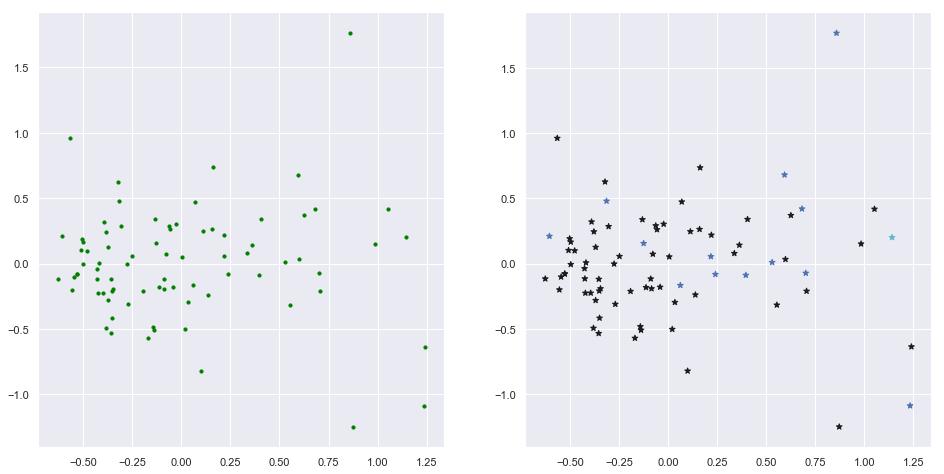

In [337]:

########## PCA of features for GA_Kmeans
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
X_PCA = pca_model.fit_transform(X)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[a], marker='*')


In [22]:

#### kmeans algorithm
from sklearn.cluster import KMeans
start = time.time()
kmean = KMeans(n_clusters=8, max_iter=500)
kmean.fit(X)
end = time.time()
print(Fore.BLUE + "k-mean algorithm time is :", end - start)
print(Fore.RESET)




k-mean algorithm time is : 0.39057183265686035



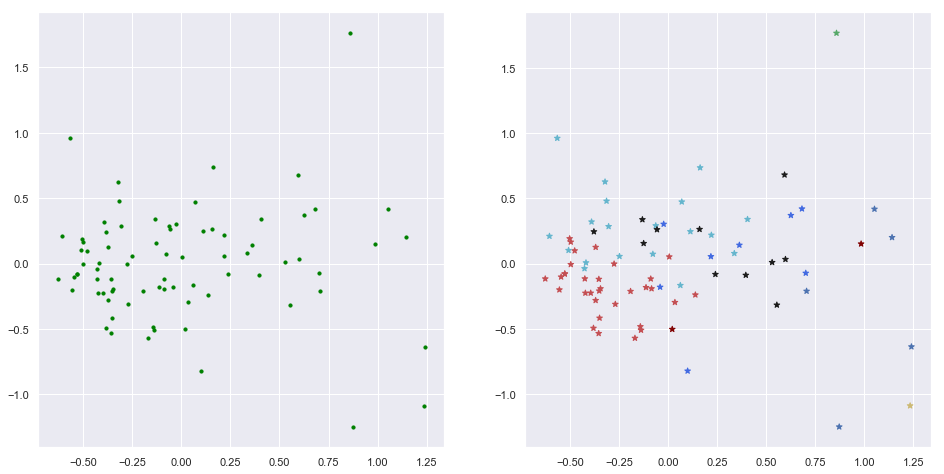

In [23]:
########## PCA of features for Kmeans
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
X_PCA = pca_model.fit_transform(X)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[kmean.labels_], marker='*')

In [28]:
from sklearn.cluster import Birch

brc = Birch(branching_factor=50, n_clusters=4, threshold=0.5, compute_labels=True)
brc.fit(X) 
# Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
#    threshold=0.5)
ClusterBirch = brc.predict(X)


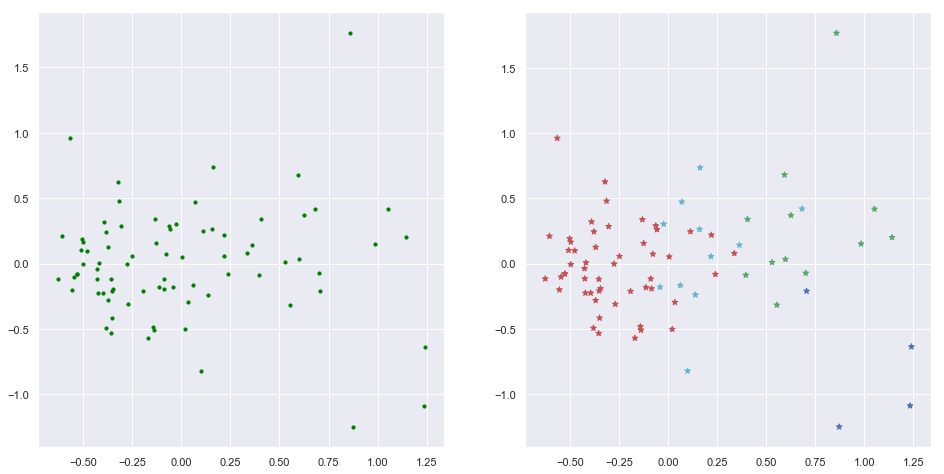

In [29]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[ClusterBirch], marker='*')

In [ ]:
GAKMeans_Sil = metrics.silhouette_score(X, a, metric='euclidean')
GAKMeans_Sil

In [322]:
labels = kmean.labels_
KMeans_Sil = metrics.silhouette_score(X, kmean.labels_, metric='euclidean')
print('Kmeans silhouette ',KMeans_Sil)

Kmeans silhouette  0.07735916746658592


In [323]:

print("Birch Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, ClusterBirch, metric='sqeuclidean'))


Birch Silhouette Coefficient: 0.176


In [309]:
# normalizer = Normalizer()
# normalizer.normalize('اصلاح نويسه ها و استفاده از نیم‌فاصله \n پردازش را آسان مي كند')
# # 'اصلاح نویسه‌ها و استفاده از نیم‌فاصله پردازش را آسان می‌کند'

In [310]:
# sent_tokenize('ما هم برای وصل کردن آمدیم! ولی برای پردازش، جدا بهتر نیست؟')
# # ['ما هم برای وصل کردن آمدیم!', 'ولی برای پردازش، جدا بهتر نیست؟']


In [107]:
# word_tokenize('ولی برای پردازش، جدا بهتر نیست؟')
# # ['ولی', 'برای', 'پردازش', '،', 'جدا', 'بهتر', 'نیست', '؟']

In [108]:
# stemmer = Stemmer()
# print(stemmer.stem(stemmer.stem('پردازش‌ها')))
# # 'کتاب'

In [109]:
# lemmatizer = Lemmatizer()
# lemmatizer.lemmatize('می‌روم')
# 'رفت#رو'

In [110]:
# tagger = POSTagger(model='resources/postagger.model')
# tagger.tag(word_tokenize('ما بسیار کتاب می‌خوانیم'))
# [('ما', 'PRO'), ('بسیار', 'ADV'), ('کتاب', 'N'), ('می‌خوانیم', 'V')]

In [111]:
# chunker = Chunker(model='resources/chunker.model')
# tagged = tagger.tag(word_tokenize('کتاب خواندن را دوست داریم'))
# tree2brackets(chunker.parse(tagged))
# '[کتاب خواندن NP] [را POSTP] [دوست داریم VP]'

In [34]:
# parser = DependencyParser(tagger=tagger, lemmatizer=lemmatizer)
# parser.parse(word_tokenize('زنگ‌ها برای که به صدا درمی‌آید؟'))
